In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data and save as a grouped csv, this step was only run once to group data, 
# some manual modifications were made on the grouped spreadsheet

dfList = []

journal_list = ['Ecology and Society', 'Global Change Biology', 'Sustainable cities and society', 
                'Water Resources Management', 'International Journal of Produc', 'IEEE Transactions on Smart Grid']

file = open('data/modelling_reading.xlsx', 'rb')
for journal in journal_list:
    dfJournal = pd.read_excel(file, sheet_name=journal, engine='openpyxl')
    dfJournal['journal'] = journal
    dfList.append(dfJournal)

  
dfList[4]['journal'] = journal_list[4] = 'International Journal of Production Research'
df = pd.concat(dfList, ignore_index=True)

# Cleaning data

## Replace False and True by numbers
df = df.replace(False, 0)
df = df.replace(True, 1)

df = df.replace('Compound indexes with mostly individual level components', 
                        'Compound indicator at individual level')
df = df.replace('Compound indexes with mostly system level components', 
                        'Compound indicator at system level')

df.to_excel('data/modelling_grouped.xlsx')

/tmp/ipykernel_16934/287880241.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(True, 1)


In [3]:
# Drop columns that will not be used
drop_columns = ['Metric name (optional)', 'System modelled', 'Disturbance modelled', 'Model type',
                'Why diversity', 'Justification from question 1', 'Justification from question 2',
                'Justification from question 3', 'Metric name (optional)', 'Type of data needed to compute',
                'Reference to original metric definition (optional)',
                'Definition of resilience (optional)', 'Other']
df = df.drop(columns=drop_columns)

# Rename columns
new_columns_name = ['paper_title', 'paper_DOI', 'reader', 'discipline', 'category', 'diversity-based', 
                    'agency-based1', 'agency-based2', 'agency-based3', 'description', 'journal']
new_columns = dict(zip(list(df.columns), new_columns_name))
df = df.rename(columns=new_columns)

In [4]:
# Print percentages

dfGroup = df.groupby(['journal', 'category']).size()
dfGroup = dfGroup.unstack()
dfGroup.loc['All journals'] = dfGroup.sum(axis=0) / dfGroup.sum(axis=0).sum()
dfGroup = dfGroup.div(dfGroup.sum(axis=1), axis=0)

dfGroup

category,Compound indicator at system level,Early-warning signals,Performance under disruption,Shape of potential landscape,System Structure
journal,,,,,
Ecology and Society,0.153846,0.153846,0.153846,0.538462,NaN
Global Change Biology,NaN,0.200000,0.466667,0.333333,NaN
IEEE Transactions on Smart Grid,NaN,NaN,1.000000,NaN,NaN
International Journal of Production Research,0.181818,NaN,0.772727,NaN,0.045455
Sustainable cities and society,0.125000,NaN,0.875000,NaN,NaN
Water Resources Management,0.047619,NaN,0.690476,NaN,0.261905
All journals,0.075758,0.037879,0.704545,0.090909,0.090909


In [5]:
len(df)

132

In [6]:
# Setting plot common variables

# Set font
plt.rc('font', size=20)

# Set category color palette
category_colors = {
  'Performance under disruption': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
  'Compound indicator at system level': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
  'Compound indicator at individual level': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
  'System Structure': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
  'Shape of potential landscape': (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
  'Early-warning signals': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0)
}

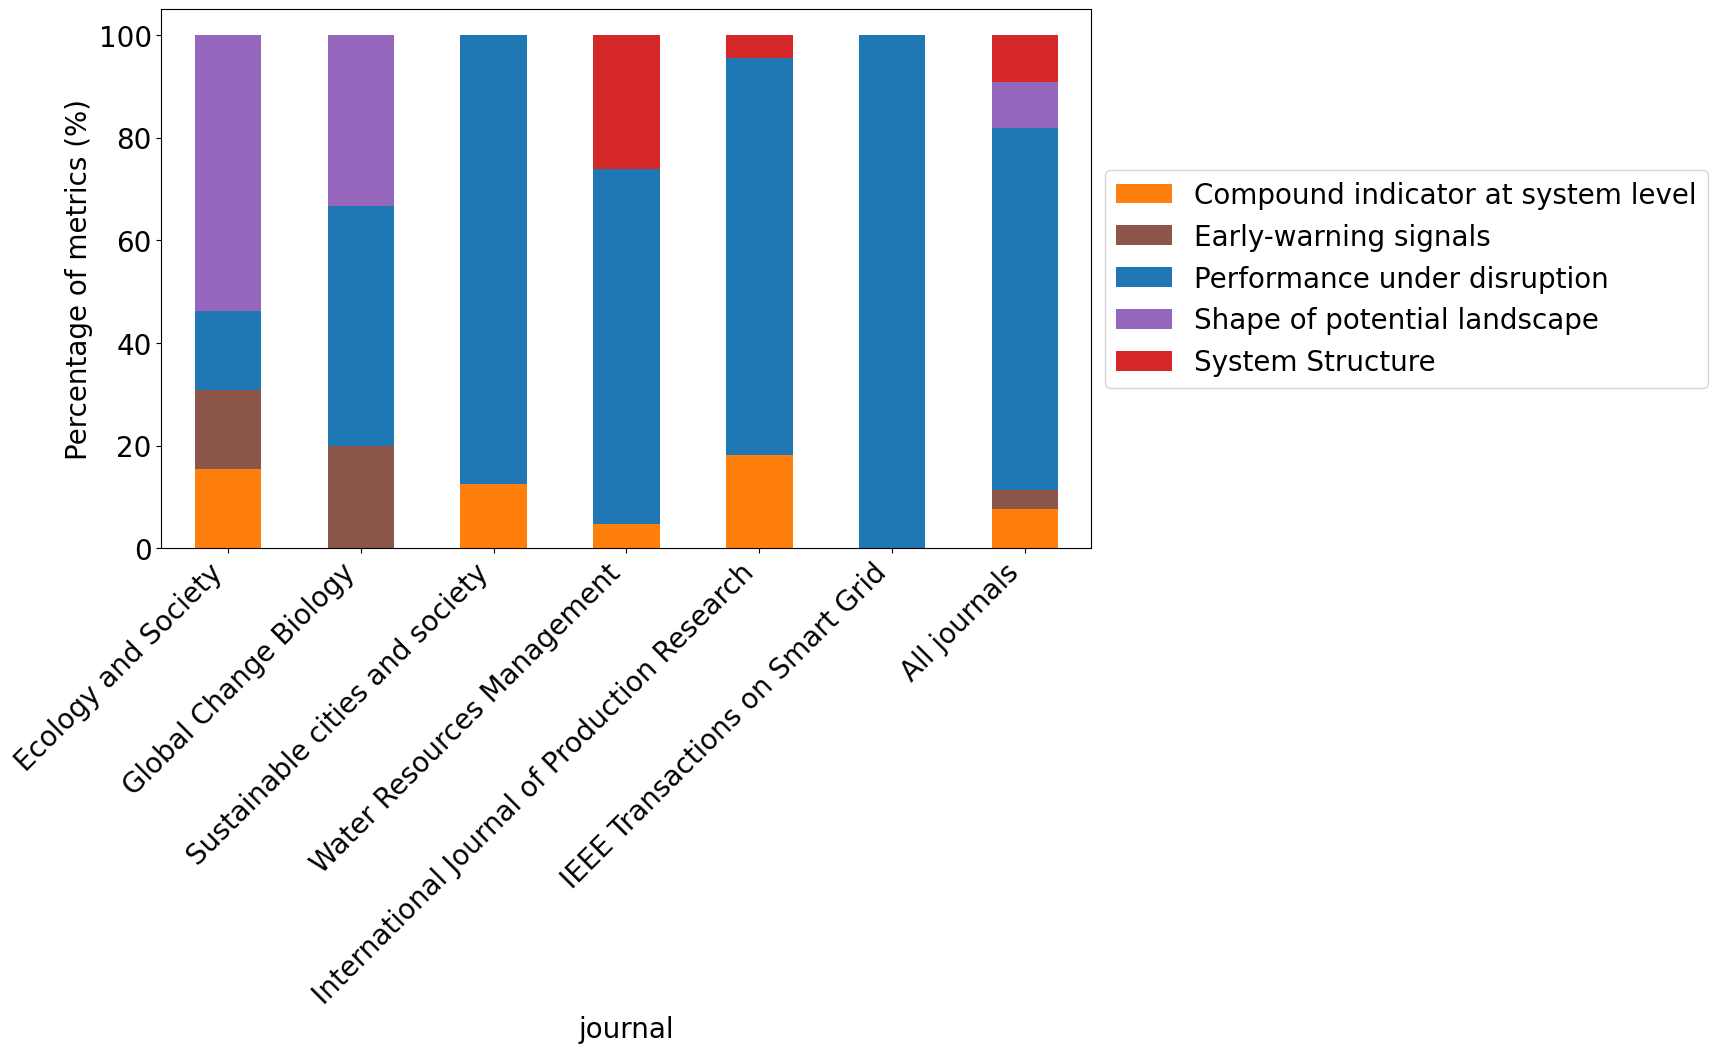

In [7]:
# Metric category per topic model

dfGroup = df.groupby(['journal', 'category']).size()
dfGroup = dfGroup.unstack().reindex(journal_list)
dfGroup.loc['All journals'] = dfGroup.sum(axis=0) / dfGroup.sum(axis=0).sum()
dfGroup = dfGroup.div(dfGroup.sum(axis=1), axis=0)
dfGroup *= 100

colors = [category_colors[cat] for cat in dfGroup.columns]
dfGroup.plot(kind='bar', stacked=True, figsize=(12, 7), color=colors)

plt.xticks(rotation=45, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Percentage of metrics (%)")

plt.savefig("results/modelling_categories.png", bbox_inches='tight')

In [8]:
# Proportion of agency and diversity-based metrics per Journal and overall
dfAgency = df[['journal', 'agency-based3']].groupby('journal').sum()
dfAgency = dfAgency.unstack()

dfGroup = df[['journal']].groupby('journal').size()
all_proportion = dfAgency.sum(axis=0) / dfGroup.sum(axis=0).sum()

dfAgency = dfAgency.div(dfGroup)
dfAgency.loc['All journals'] = all_proportion

print(dfAgency)

dfDiversity = df[['journal', 'diversity-based']].groupby('journal').sum()
dfDiversity = dfDiversity.unstack()

dfGroup = df[['journal']].groupby('journal').size()
all_proportion = dfDiversity.sum(axis=0) / dfGroup.sum(axis=0).sum()

dfDiversity = dfDiversity.div(dfGroup)
dfDiversity.loc['All journals'] = all_proportion

print(dfDiversity)

               journal                                     
agency-based3  Ecology and Society                             0.076923
               Global Change Biology                           0.000000
               IEEE Transactions on Smart Grid                 0.000000
               International Journal of Production Research    0.090909
               Sustainable cities and society                  0.125000
               Water Resources Management                      0.000000
All journals                                                   0.037879
dtype: float64
                 journal                                     
diversity-based  Ecology and Society                             0.153846
                 Global Change Biology                           0.066667
                 IEEE Transactions on Smart Grid                 0.000000
                 International Journal of Production Research    0.136364
                 Sustainable cities and society                

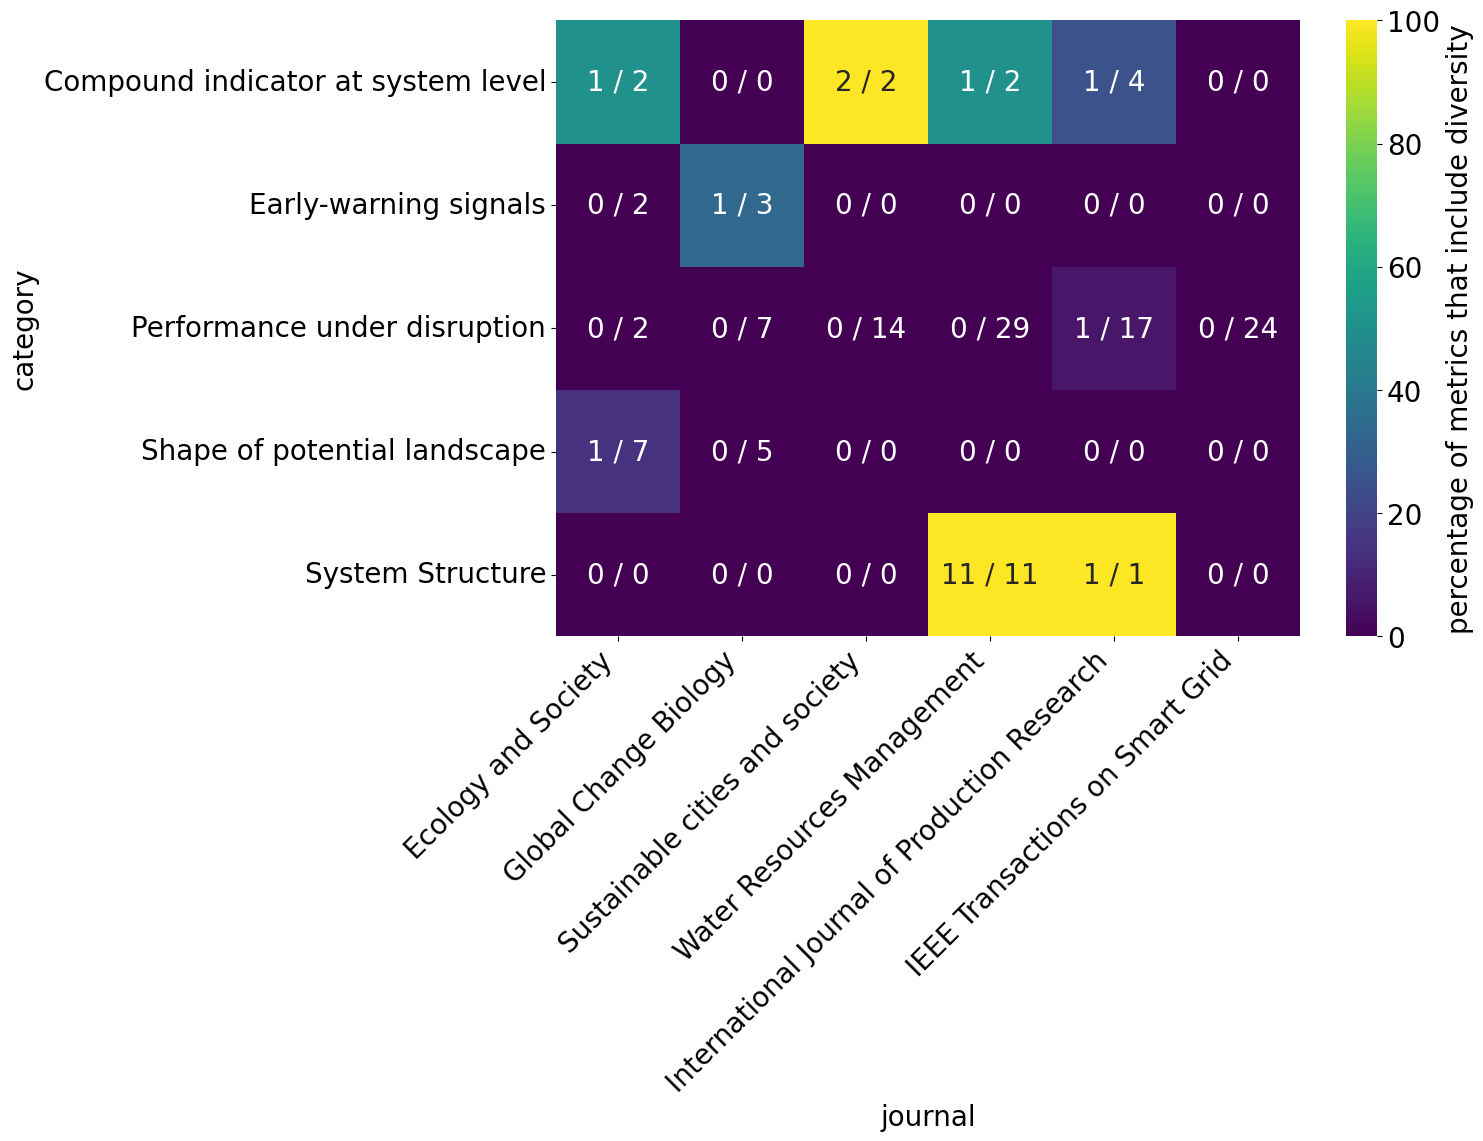

In [9]:
# Diversity-based metric per category and topic model

number_diversity = df[['journal', 'category', 'diversity-based']].groupby(['journal', 'category']).sum()
number_diversity = number_diversity['diversity-based'].map(int)
number_metric = df[['journal', 'category', 'diversity-based']].groupby(['journal', 'category']).count()
number_metric = number_metric['diversity-based']

annotate = number_diversity.map(str) + ' / ' + number_metric.map(str)
annotate = annotate.unstack().T.fillna('0 / 0')

percentage = 100 * number_diversity / number_metric
percentage = percentage.unstack().T.fillna(0)

plt.figure(figsize=(12, 8))
label_cbar = 'percentage of metrics that include diversity'
sns.heatmap(percentage[journal_list], annot=annotate[journal_list], fmt="", cbar_kws={'label': label_cbar}, cmap='viridis')
plt.xticks(rotation=45, ha='right')

plt.savefig("results/modelling_diversity.png", bbox_inches='tight')

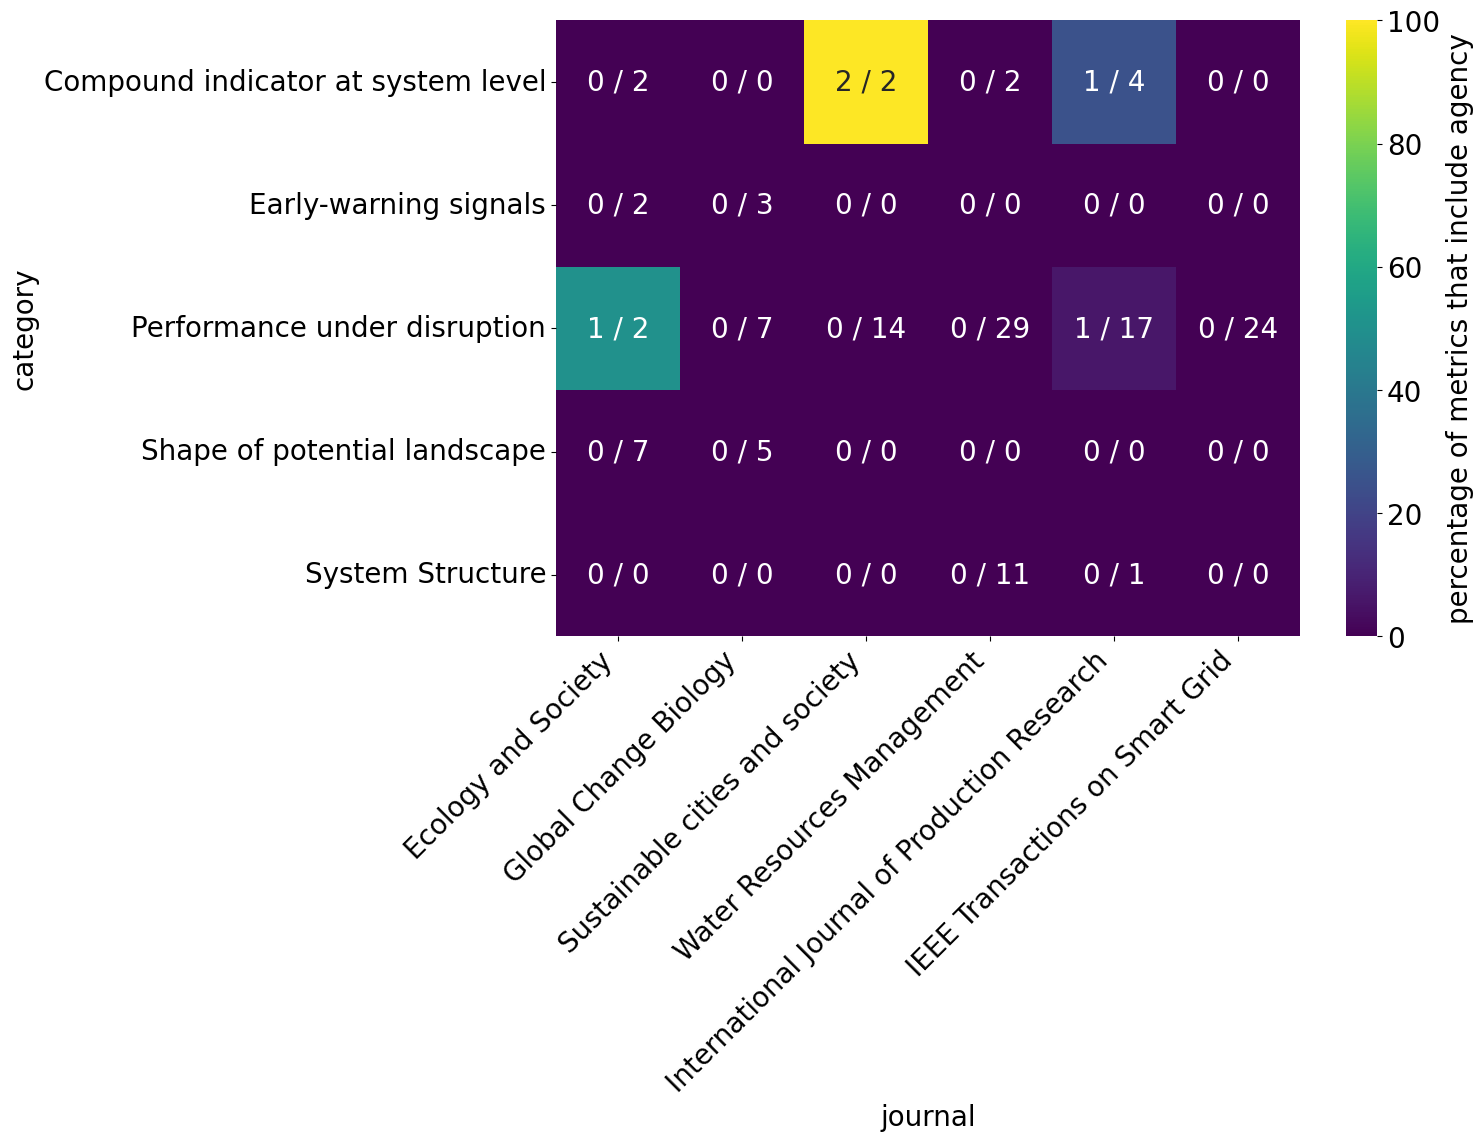

In [10]:
# Diversity-based metric per category and topic model


number_agency3 = df[['journal', 'category', 'agency-based3']].groupby(['journal', 'category']).sum()
number_agency3 = number_agency3['agency-based3'].map(int)
number_metric = df[['journal', 'category', 'agency-based3']].groupby(['journal', 'category']).count()
number_metric = number_metric['agency-based3']

annotate = number_agency3.map(int).map(str) + ' / ' + number_metric.map(str)
annotate = annotate.unstack().T.fillna('0 / 0')

percentage = 100 * number_agency3 / number_metric
percentage = percentage.unstack().T.fillna(0)

plt.figure(figsize=(12, 8))
label_cbar = 'percentage of metrics that include agency'
sns.heatmap(percentage[journal_list], annot=annotate[journal_list], fmt="", cbar_kws={'label': label_cbar}, cmap='viridis')

plt.xticks(rotation=45, ha='right')

plt.savefig("results/modelling_agency.png", bbox_inches='tight')